### Loading the libraries

In [501]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,LabelEncoder
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import pylab
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

### Loading the train and test datasets

In [502]:
train1 = pd.read_csv("train_loan.csv")
test1 = pd.read_csv("test_loan.csv")

In [503]:
train =pd.concat([train1,test1],ignore_index=True)

C:\Users\Toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


### Displaying the first five rows of the train and test dataset.

In [504]:
train.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [505]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [506]:
data.head()

,ApplicantIncome,Applicant_Income_Category,CoapplicantIncome,Coapplicant_Income_Category,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Category,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Total_Income,Total_Income_Category
0,5849,Average,0.0,NaN,1.0,0,Graduate,Male,128.0,Average,360.0,LP001002,1.0,No,Urban,No,5849.0,NaN
1,4583,Average,1508.0,Low,1.0,1,Graduate,Male,128.0,Average,360.0,LP001003,0.0,Yes,Rural,No,6091.0,Low
2,3000,Low,0.0,NaN,1.0,0,Graduate,Male,66.0,Average,360.0,LP001005,1.0,Yes,Urban,Yes,3000.0,NaN
3,2583,Low,2358.0,Average,1.0,0,Not Graduate,Male,120.0,Average,360.0,LP001006,1.0,Yes,Urban,No,4941.0,Low
4,6000,Average,0.0,NaN,1.0,0,Graduate,Male,141.0,Average,360.0,LP001008,1.0,No,Urban,No,6000.0,NaN


In [507]:
data.isnull().sum()

ApplicantIncome                  0
Applicant_Income_Category      367
CoapplicantIncome                0
Coapplicant_Income_Category    640
Credit_History                  29
Dependents                      10
Education                        0
Gender                          11
LoanAmount                       5
Loan_Amount_Category           367
Loan_Amount_Term                 6
Loan_ID                          0
Loan_Status                    367
Married                          0
Property_Area                    0
Self_Employed                   23
Total_Income                   367
Total_Income_Category          640
dtype: int64

### Describing the basics

In [508]:
train.describe(include="all")

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
count,981.000000,981.000000,902.000000,956,981,957,954.000000,961.000000,981,614,978,981,926
unique,NaN,NaN,NaN,4,2,2,NaN,NaN,981,2,2,3,2
top,NaN,NaN,NaN,0,Graduate,Male,NaN,NaN,LP001268,Y,Yes,Semiurban,No
freq,NaN,NaN,NaN,545,763,775,NaN,NaN,1,422,631,349,807
mean,5179.795107,1601.916330,0.835920,NaN,NaN,NaN,142.511530,342.201873,NaN,NaN,NaN,NaN,NaN
std,5695.104533,2718.772806,0.370553,NaN,NaN,NaN,77.421743,65.100602,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN
25%,2875.000000,0.000000,1.000000,NaN,NaN,NaN,100.000000,360.000000,NaN,NaN,NaN,NaN,NaN
50%,3800.000000,1110.000000,1.000000,NaN,NaN,NaN,126.000000,360.000000,NaN,NaN,NaN,NaN,NaN
75%,5516.000000,2365.000000,1.000000,NaN,NaN,NaN,162.000000,360.000000,NaN,NaN,NaN,NaN,NaN


In [509]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


### Imputation of Null Values in the Dataset

In [510]:
train.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [511]:
train.isnull().sum().sum()

600

In [512]:
train.shape

(981, 13)

In [513]:
train.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [514]:
train.Gender.mode()

0    Male
dtype: object

In [515]:
train.Gender.fillna("Male",inplace=True)

In [516]:
train.Gender.isnull().sum()

0

In [517]:
train.Married.mode()

0    Yes
dtype: object

In [518]:
train.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [519]:
train.Married.fillna("Yes",inplace=True)

In [520]:
train.Married.isnull().sum()

0

In [521]:
train.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [522]:
train.Dependents.fillna(0,inplace=True)

In [523]:
train.Dependents.isnull().sum()

0

In [524]:
train.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [525]:
train.Self_Employed.fillna("No",inplace=True)

In [526]:
train.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [527]:
train.LoanAmount.median()

126.0

In [528]:
train.LoanAmount.fillna(128,inplace=True)

In [529]:
train.Loan_Amount_Term.median()

360.0

In [530]:
train.Loan_Amount_Term.fillna(360.0,inplace=True)

In [531]:
train.Credit_History = train.Credit_History.astype(object)

In [532]:
train.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [533]:
train.Credit_History.fillna(1.0,inplace=True)

In [534]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


### Exploratory Data Analysis

### Univariate Analysis

Single Variables

1. Numerical - Distplot or Histplot

2. Categorical - Barplot or CountPlot

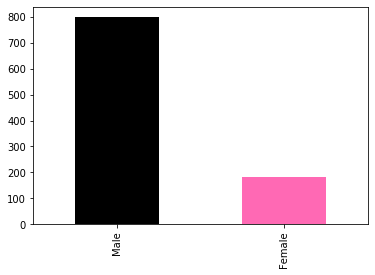

In [535]:
train.Gender.value_counts().plot(kind="bar",color=["black","hotpink"])

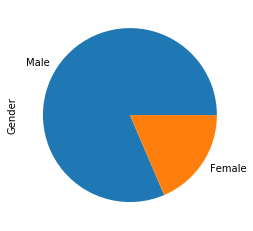

In [536]:
train.Gender.value_counts().plot(kind="pie")

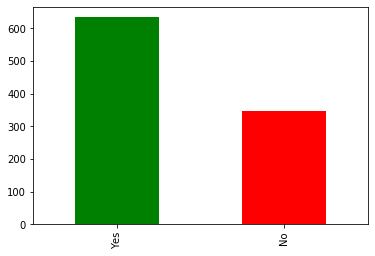

In [537]:
train.Married.value_counts().plot(kind="bar",color=["green","red"])

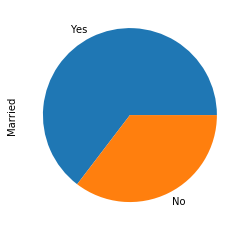

In [538]:
train.Married.value_counts().plot(kind="pie")

In [539]:
train.Dependents.value_counts()

0     545
2     160
1     160
3+     91
0      25
Name: Dependents, dtype: int64

In [540]:
train.Dependents.unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [541]:
train["Dependents"] = train.Dependents.replace(0,"0")

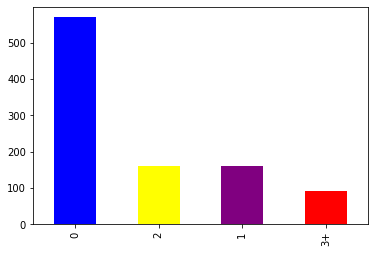

In [542]:
train.Dependents.value_counts().plot(kind="bar",color=["blue","yellow","purple","red","black"])

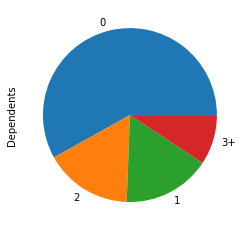

In [543]:
train.Dependents.value_counts().plot(kind="pie")

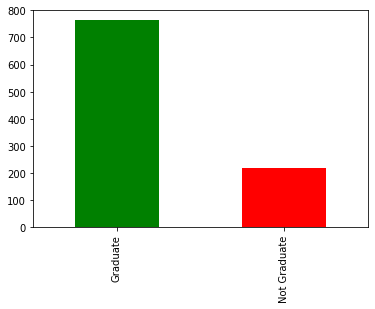

In [544]:
train.Education.value_counts().plot(kind="bar",color=["green","red"])

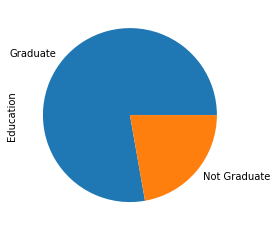

In [545]:
train.Education.value_counts().plot(kind="pie")

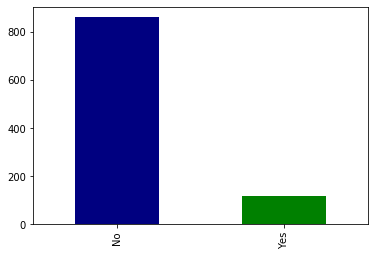

In [546]:
train.Self_Employed.value_counts().plot(kind="bar",color=["navy","green"])

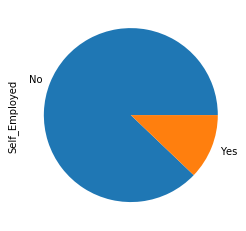

In [547]:
train.Self_Employed.value_counts().plot(kind="pie")

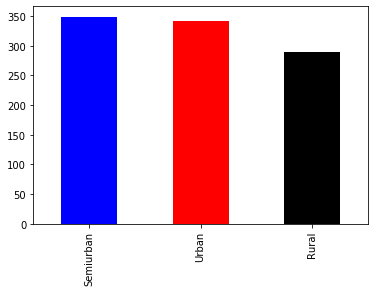

In [548]:
train.Property_Area.value_counts().plot(kind="bar",color=["blue","red","black"])

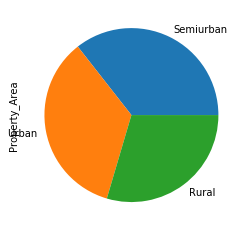

In [549]:
train.Property_Area.value_counts().plot(kind="pie")

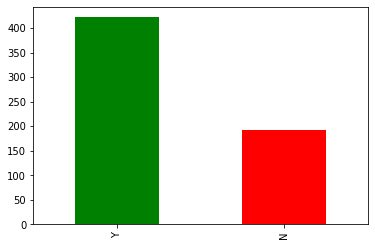

In [550]:
train.Loan_Status.value_counts().plot(kind="bar",color=["green","red"])

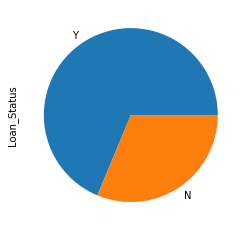

In [551]:
train.Loan_Status.value_counts().plot(kind="pie")

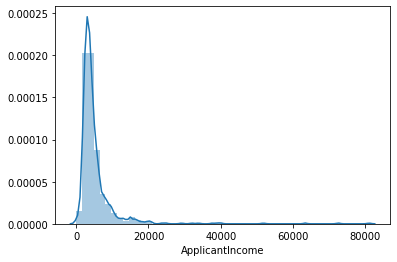

In [553]:
sns.distplot(train.ApplicantIncome)

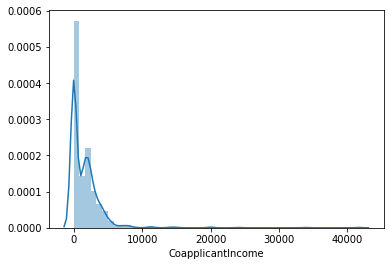

In [131]:
sns.distplot(train.CoapplicantIncome)

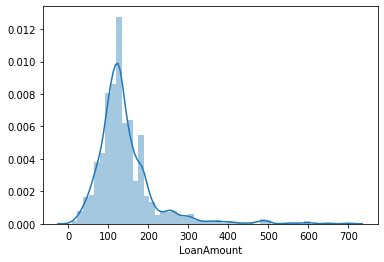

In [132]:
sns.distplot(train.LoanAmount)

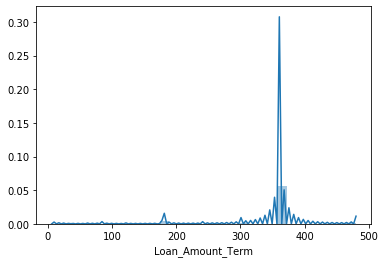

In [133]:
sns.distplot(train.Loan_Amount_Term)

### Bivariate Analysis
Predictor Variable vs Target Variable

1. Numerical vs Numerical- Scatterplot

2. Numerical vs Categorical- Boxplot or Violinplot

3. Categorical vs Categorical- Barplot or Table or pd.crosstab

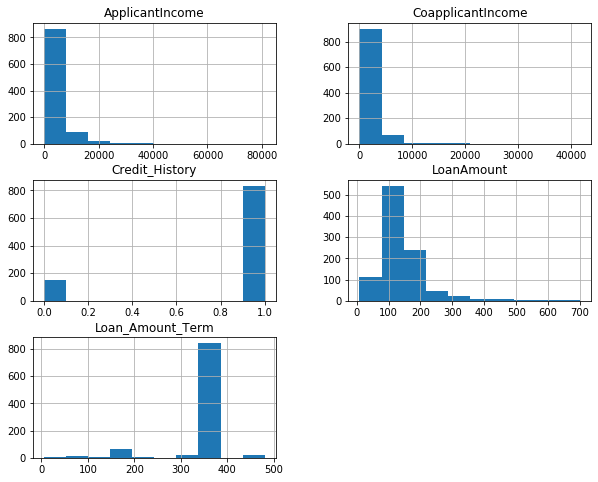

In [134]:
train.hist(figsize=[10,8])
plt.show()

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


<Figure size 720x576 with 0 Axes>

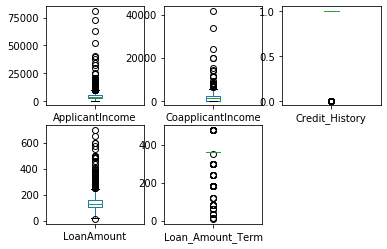

In [136]:
plt.figure(figsize=[10,8])
train.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()

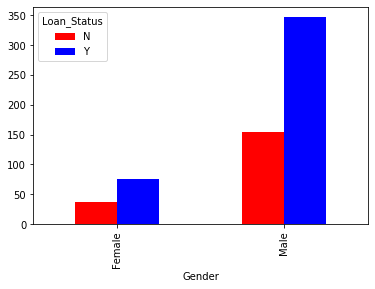

In [137]:
pd.crosstab(train.Gender,train.Loan_Status).plot(kind="bar",color=["r","b"])

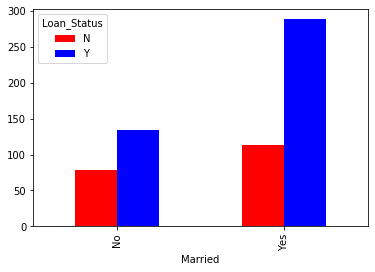

In [138]:
pd.crosstab(train.Married,train.Loan_Status).plot(kind="bar",color=["r","b"])

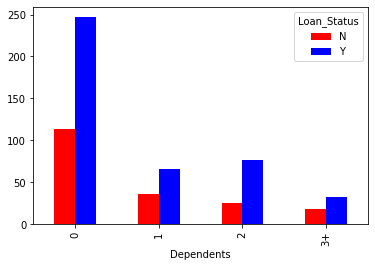

In [139]:
pd.crosstab(train.Dependents,train.Loan_Status).plot(kind="bar",color=["r","b"])

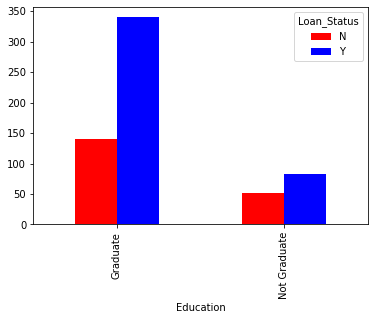

In [140]:
pd.crosstab(train.Education,train.Loan_Status).plot(kind="bar",color=["r","b"])

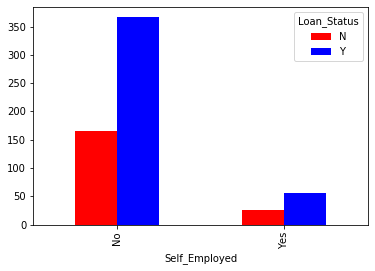

In [141]:
pd.crosstab(train.Self_Employed,train.Loan_Status).plot(kind="bar",color=["r","b"])

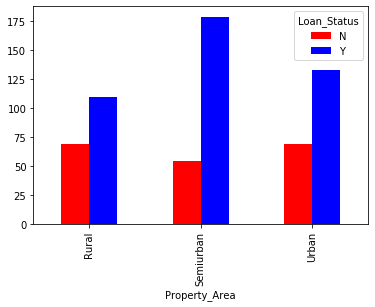

In [142]:
pd.crosstab(train.Property_Area,train.Loan_Status).plot(kind="bar",color=["r","b"])

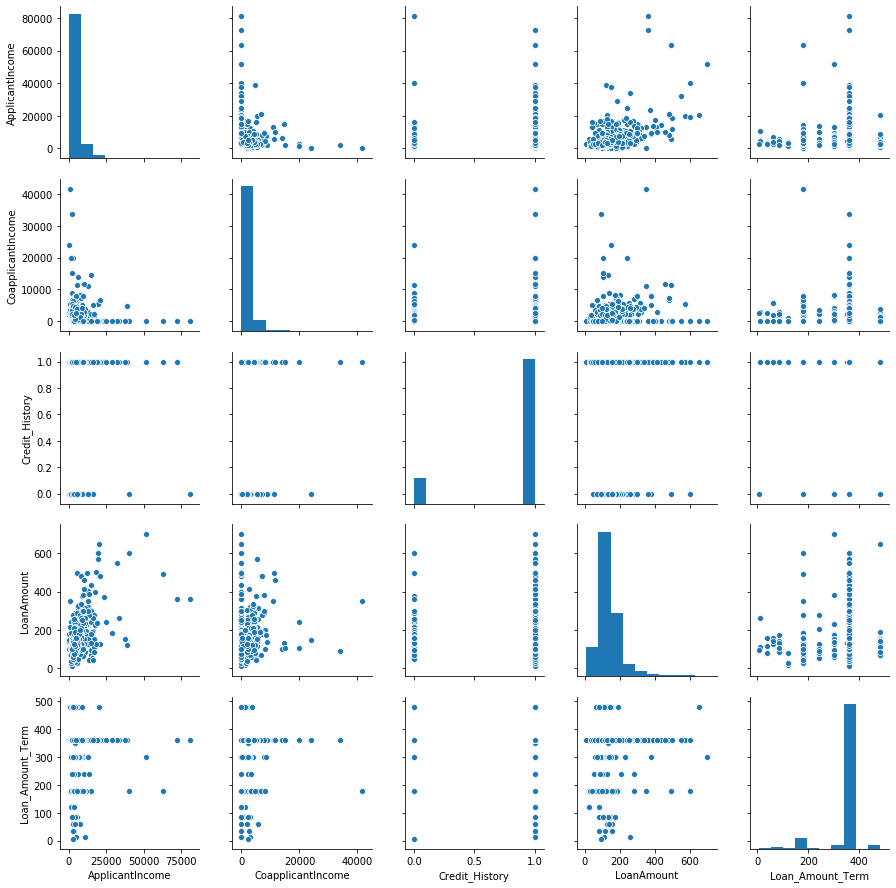

In [143]:
sns.pairplot(train)

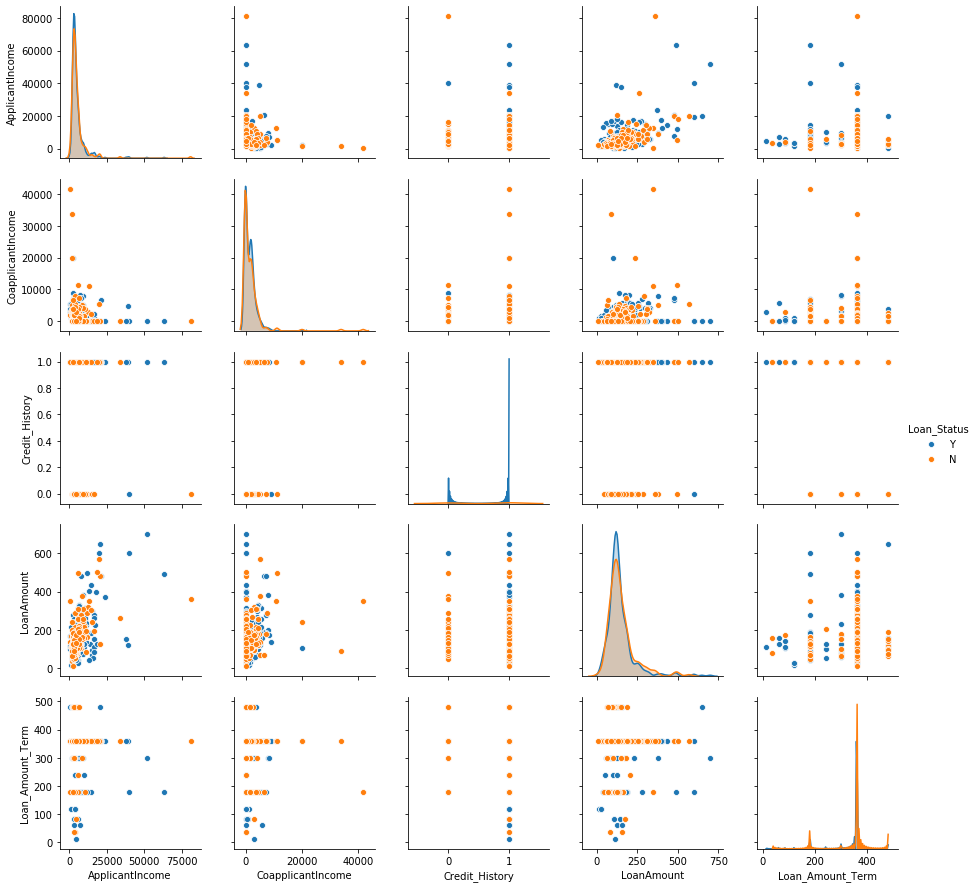

In [144]:
sns.pairplot(train,hue="Loan_Status")

### Possible feature engineering

In [145]:
train.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,128.0,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [427]:
bins = [0,3000,7000,11000,81000]
train["Applicant_Income_Category"] = pd.cut(train.ApplicantIncome,bins,labels=["Low","Average","High","Very High"])

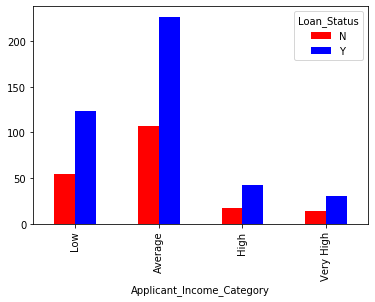

In [428]:
pd.crosstab(train.Applicant_Income_Category,train.Loan_Status).plot(kind="bar",color=["r","b"])

In [429]:
bins = [0,2000,4000,6000,50000]
train["Coapplicant_Income_Category"] = pd.cut(train.CoapplicantIncome,bins,labels=["Low","Average","High","Very High"])

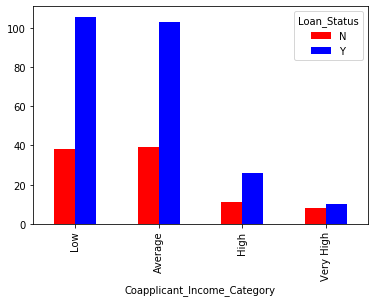

In [430]:
pd.crosstab(train.Coapplicant_Income_Category,train.Loan_Status).plot(kind="bar",color=["r","b"])

In [431]:
train["Total_Income"] = train["ApplicantIncome"]+train["CoapplicantIncome"]

In [432]:
bins = [0,4000,8000,12000,81000]
train["Total_Income_Category"] = pd.cut(train.CoapplicantIncome,bins,labels=["Low","Average","High","Very High"])

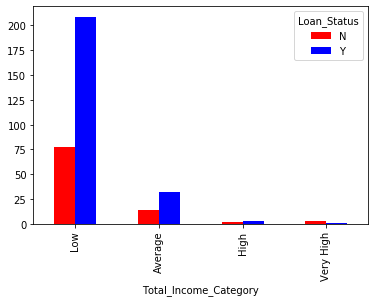

In [433]:
pd.crosstab(train.Total_Income_Category,train.Loan_Status).plot(kind="bar",color=["r","b"])

In [434]:
bins = [0,50,300,700]
train["Loan_Amount_Category"] = pd.cut(train.LoanAmount,bins,labels=["Low","Average","High"])

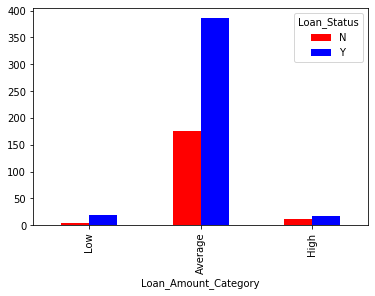

In [435]:
pd.crosstab(train.Loan_Amount_Category,train.Loan_Status).plot(kind="bar",color=["r","b"])

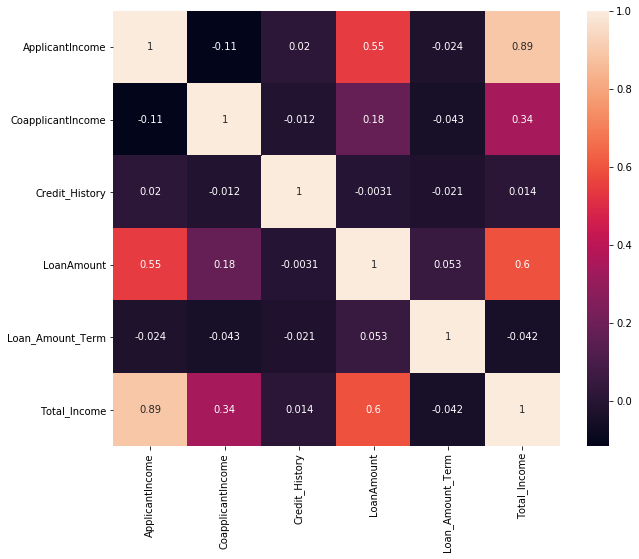

In [436]:
plt.figure(figsize=[10,8])
sns.heatmap(train.corr(),annot=True)
plt.show()

### Defining X and Y and then splitting the data set into train and test.

In [440]:
train.Loan_Status.replace("NaN",np.NaN,inplace=True)

In [441]:
train2 = train[train.Loan_Status.notnull()]
test2 = train[train.Loan_Status.isnull()]

In [442]:
xtrain = train2.drop("Loan_Status",axis=1)
ytrain= train2.Loan_Status

In [443]:
xtest=test2.drop("Loan_Status",axis=1)
ytest=test2.Loan_Status

### Label Encoding of the target variable and One Hot Encoding for predictors

In [444]:
train2.Loan_Status = train2.Loan_Status.map({"Y":1,"N":0})

In [451]:
dummy_train = pd.get_dummies(xtrain.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Total_Income"],axis=1))

In [452]:
dummy_test = pd.get_dummies(xtest.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Total_Income"],axis=1))

In [453]:
train

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Applicant_Income_Category,Coapplicant_Income_Category,Total_Income,Total_Income_Category,Loan_Amount_Category
0,5849,0.0,1.0,0,Graduate,Male,128.0,360.0,LP001002,1.0,No,Urban,No,Average,NaN,5849.0,NaN,Average
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,0.0,Yes,Rural,No,Average,Low,6091.0,Low,Average
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,1.0,Yes,Urban,Yes,Low,NaN,3000.0,NaN,Average
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,1.0,Yes,Urban,No,Low,Average,4941.0,Low,Average
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,1.0,No,Urban,No,Average,NaN,6000.0,NaN,Average
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,1.0,Yes,Urban,Yes,Average,High,9613.0,Average,Average
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,1.0,Yes,Urban,No,Low,Low,3849.0,Low,Average
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,0.0,Yes,Semiurban,No,Average,Average,5540.0,Low,Average
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,1.0,Yes,Urban,No,Average,Low,5532.0,Low,Average
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,0.0,Yes,Semiurban,No,Very High,Very High,23809.0,High,High


In [454]:
LR = LogisticRegression()

In [457]:
Predict_LR = LR.fit(dummy_train,ytrain).predict(dummy_test)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [461]:
ytest.isnull().sum()

367

In [467]:
len(Predict_LR)

367

In [468]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":Predict_LR})
solution.to_csv("Loan_status_Predict_LR.csv",index=False)    # 77.08% accuracy

In [469]:
rf = RandomForestClassifier(random_state=123)

In [470]:
predict_rf = rf.fit(dummy_train,ytrain).predict(dummy_test)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [471]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":predict_rf})
solution.to_csv("Loan_status_predict_rf.csv",index=False)    # 73.611% accuracy

In [472]:
dt = DecisionTreeClassifier(random_state=123)

In [473]:
predict_dt = dt.fit(dummy_train,ytrain).predict(dummy_test)

In [474]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":predict_dt})
solution.to_csv("Loan_status_predict_dt.csv",index=False)    # 66.6666% accuracy

In [475]:
knn = KNeighborsClassifier()

In [476]:
predict_knn = knn.fit(dummy_train,ytrain).predict(dummy_test)

In [477]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":predict_knn})
solution.to_csv("Loan_status_predict_knn.csv",index=False)    #72.222% accuracy

In [478]:
gbc = GradientBoostingClassifier(random_state=123)

In [479]:
predict_gbc = gbc.fit(dummy_train,ytrain).predict(dummy_test)

In [480]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":predict_gbc})
solution.to_csv("Loan_status_predict_gbc.csv",index=False)    #76.38% accuracy

In [489]:
from sklearn.model_selection import GridSearchCV  

In [491]:
RandFor = RandomForestClassifier(random_state=123)
params = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}
cv_RF = GridSearchCV(RandFor, cv = 10,param_grid=params)
cv_RF.fit(dummy_train,ytrain)
print('Best Parameters using grid search: \n', cv_RF.best_params_)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None}


C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarnin

In [492]:
Predict_RF_GridCV = RandomForestClassifier(bootstrap=True,criterion = 'entropy',max_features = None,max_depth = 3).fit(dummy_train,ytrain).predict(dummy_test)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [493]:
solution=pd.DataFrame({"Loan_ID":xtest.Loan_ID, "Loan_Status":Predict_RF_GridCV})
solution.to_csv("Loan_status_predict_rf_gridcv.csv",index=False)    #77.78% accuracy

In [589]:
ytrain = ytrain.map({"Y":1,"N":0})